In [1]:
## Libreria de control
try:
  from control.matlab import *
except:
  !pip install control
  from control.matlab import *
    
## Libreria para graphicar
import matplotlib.pyplot as plt
import numpy

## Libreria para calculo simbolico
import sympy

## Libreria de control
import control

## Libreria para widgets
import ipywidgets as widgets

## Libreria para animaciones
from matplotlib.animation import FuncAnimation
plt.rcParams["animation.html"] = "html5"#"jshtml"

## Libreria para importar Iframe de Youtube
from IPython.display import IFrame

# Estabilidad de sistemas LTI
_Entendamos como un sistema se comporta_

# Dinámica del sistema

![](3-ecuacion.png)

- Empecemos ignorando la entrada del sistema, el estado será $x$

$$\array{\dot{x}=A\, x &&& x(t_0)=x_0}$$

¿Cuál es la respuesta temporal?

# Resolviendo la ecuación diferencial ordinaria

Si todo fuera escalar:

$$\array{\dot{x}=a\, x  &,& x(t_0)=x_0 & \to & x(t)=e^{a(t-t_0))}x_0 }$$

Como sabemos esto? verificamos la posible solución:

$$\array{
x(t_0)=e^{a(t_0-t_0))}x_0=e^{0}x_0=x_0 & \text{condición inicial verificada}\\
\frac{d}{dt}x(t_0)=ae^{a(t-t_0))}x_0=ax & \text{dinámica verificada}
} $$

Para sistemas de orden superior, tenemos una versión matricial de esto:

$$\array{\dot{x}=A\, x &,& x(t_0)=x_0 &\to& x(t)=e^{A(t-t_0))}x_0}$$

# Exponencial de una matriz

La definición es similar a la definición de escalares: 

$$e^{at}=\sum_{k=0}^\infty\frac{a^kt^k}{k!} \qquad\qquad e^{At}=\sum_{k=0}^\infty\frac{A^kt^k}{k!}$$

cuya derivada es:

$$\frac{d}{dt} \sum_{k=0}^\infty\frac{A^kt^k}{k!} 
= 0 + \sum_{k=0}^\infty\frac{kA^kt^{k-1}}{k!} 
= A\sum_{k=0}^\infty\frac{kA^{k-1}t^{k-1}}{(k-1)!}
= A\sum_{k=0}^\infty\frac{A^kt^k}{k!} $$

es decir que:

$$\frac{d}{dt}e^{At}=Ae^{At}$$

# Resolviendo la ecuación del controlador

La exponencial de una matriz tiene un papel fundamental y por eso tiene su propio nombre. 

**Matriz de transición de estado**

$$e^{A(t-t_0))}=\Phi(t,t_0)$$

para una dinámica de estado $\dot{x}= A x$ la solución será $x(t)=\Phi(t,\tau)x(\tau)$, tiene las siguientes propiedades: 

$$\cases{\frac{d}{dt}\Phi(t,t_0)=A\Phi(t,t_0) \\ \Phi(t,t)=I}$$

Cuando tenemos un sistema controlado, tendremos:

$$x(t)= \Phi(t,t_0)x(t_0)+\int_{t_0}^{t}\Phi(t,\tau)B\,u(\tau)d\tau$$

# Resolviendo la ecuación del controlador

Verifiquemos que la ecuación cumple con la condición inicial:

$$x(t_0)= \Phi(t_0,t_0)x(t_0)+\int_{t_0}^{t_0}\Phi(t_0,\tau)B\,u(\tau)d\tau = I x(t_0) + 0 = x(t_0)$$

$$x(t)= \Phi(t,t_0)x(t_0)+\int_{t_0}^{t}\Phi(t,\tau)B\,u(\tau)d\tau$$

y cumple para la derivada: 

$$\frac{d}{dt}x(t)= A\Phi(t,t_0)x(t_0)+\frac{d}{dt}\int_{t_0}^{t}\Phi(t,\tau)B\,u(\tau)d\tau$$

$$\frac{d}{dt}\int_{t_0}^{t}f(t,\tau)d\tau = f(t,t) +\int_{t_0}^{t} \frac{d}{dt}f(t,\tau)d\tau = \Phi(t,t)B\,u(t) + \int_{t_0}^{t} A\Phi(t,\tau)B\,u(\tau)d\tau$$

$$\frac{d}{dt}x(t)= A\Phi(t,t_0)x(t_0)+B\,u(t) + \int_{t_0}^{t} A\Phi(t,\tau)B\,u(\tau)d\tau$$

$$\frac{d}{dt}x = Ax + B u$$

# En resumen

tenemos que

$$\dot{x}=A\,x+B\,u \qquad y \qquad y=C\,x$$

luego,

$$y(t) = C \Phi(t,t_0)x(t_0) + C \int_{t_0}^{t}\Phi(t,\tau)B\,u(\tau)d\tau$$

sabiendo que 

$$\Phi(t,\tau)= e^{A(t-\tau)}$$

# Estabilidad

Lo primero que debemos hacer es entender por que un sistema explota o no.

Recordemos que los objetivos en control son: 
     
- Ser estable
- Seguir el objetivo
- Ser robusto
- Entre otros

# Estabilidad en sistemas escalares

- Es útil empezar con sistemas escalares para ganar intuición.

$$\dot{x}=a\,x \quad \to\quad x(t)= e^{at}x(0)$$

con $a>0$

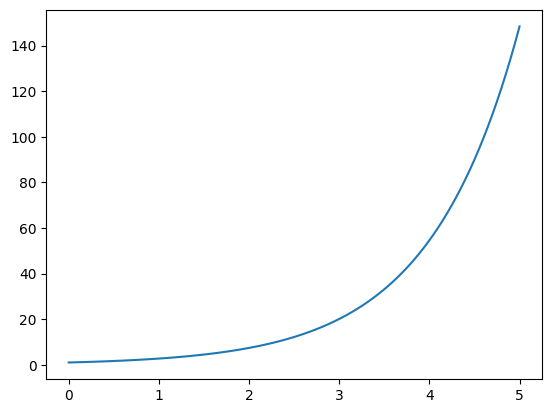

In [2]:
t = numpy.linspace(0,5,num=100)
y = numpy.exp(1*t)
plt.plot(t,y);

# Estabilidad en sistemas escalares

- Es útil empezar con sistemas escalares para ganar intuición.

$$\dot{x}=a\,x \quad \to\quad x(t)= e^{at}x(0)$$

con $a<0$

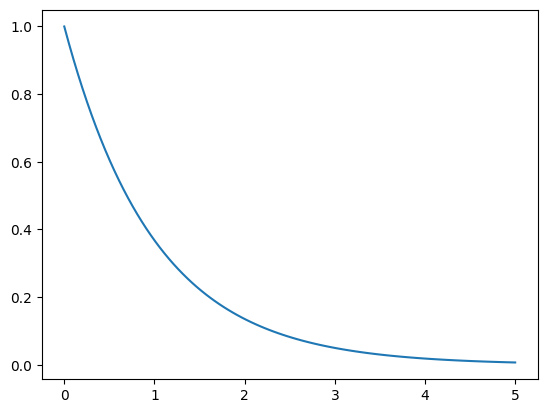

In [3]:
t = numpy.linspace(0,5,num=100)
y = numpy.exp(-1*t)
plt.plot(t,y);

# Estabilidad en sistemas escalares

- Es útil empezar con sistemas escalares para ganar intuición.

$$\dot{x}=a\,x \quad \to\quad x(t)= e^{at}x(0)$$

con $a=0$

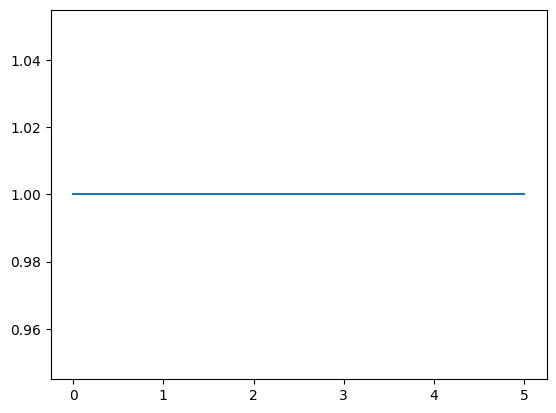

In [4]:
t = numpy.linspace(0,5,num=100)
y = numpy.exp(0*t)
plt.plot(t,y);

# Tres casos

- Asintóticamente estable: $x(t)\to0, \forall x(0)$
- Inestable: $\exists x(0) : ||{x(t)}||\to\infty$
- Críticamente estable: en medio, no explota pero tampoco llega a cero

**De**

$$\dot{x}=a\,x \quad \to\quad x(t)= e^{at}x(0)$$

tenemos entonces:

$$\cases{
a>0 \quad: & \text{inestable} \\
a<0 \quad: & \text{asintóticamente estable}\\
a=0 \quad: & \text{críticamente estable}
}$$

# Estabilidad en Matrices

$$\dot{x}=A\,x \quad \to\quad x(t)= e^{At}x(0)$$

No podemos decir que $A>0$, pero podemos usar los valores propios.

$$A\,v = \lambda\,v$$

donde $\lambda \in \mathscr{C}$ son los valores propios y $v \in \mathscr{R}^n$ son los vectores propios. 

Los valores propios no diran como la matriz $A$ actua en cada dirección. 

**En MATLAB**

``` matlab
>> eig(A)
```

# Ejemplo

Para la siguiente matriz 

$$A = \left[\array{1&0\\0&-1}\right]$$

encontrar los valores y vectores propios ⚠️

$$\array{\lambda_1=1 &,& \lambda_2=-1 &,& v_1=\left[\array{1\\0}\right] &,& v_1=\left[\array{0\\1}\right]}$$

# Estabilidad de Matrices

$$\dot{x}=A\,x \quad \to\quad x(t)= e^{At}x(0)$$

- Asintóticamente estable (si y solo si):
  $$Re(\lambda)<0, \forall\lambda \in \texttt{eig}(A)$$
- Inestable (si):
  $$\exists\lambda\in\texttt{eig}(A) : Re(\lambda)>0$$
- Críticamente estable (solo si):
  $$Re(\lambda)\le0, \forall\lambda \in \texttt{eig}(A)$$
- Críticamente estable (si):
  Un valor propio es cero y el resto tienen parte real negativa **o** Dos valores propios son puramente imaginarios y el resto tienen parte real negativa.

# El cuento de dos pendulos

Encontremos las matrices para un péndulo regular y un péndulo invertido. Sin fricción. ⚠️

$$A_{\text{péndulo regular}} = \left[\array{0&1\\-1&0}\right] \qquad A_{\text{péndulo invertido}} = \left[\array{0&1\\1&0}\right]$$

encontremos los valores propios ⚠️

- Para el péndulo regular tenemos:
  $$\lambda_1 = j \qquad \lambda_2=-j$$
  
- Para el péndulo invertido tenemos:
  $$\lambda_1 = -1 \qquad \lambda_2=1$$
  
¿Sistemas estables? 

# Enjambre de robots

Analicemos la estabilidad de un enjambre de robots para resolver el problema de _Rendezvous_

- Tenemos una colección de robots que pueden medir su posición relativa a sus vecinos. 
- Problema: hacer que todos los robots se encuentren en el mismo lugar (no especificada). 

# Caso de dos robots simples

Anteriormente revisamos el caso de dos robots en una linea. 

![](3-dos-robots.png)

Si los robots se dirigen el uno hacia el otro tenemos:

$$\cases{u_1=x_2-x_1\\u_2=x_1-x_2}$$

La matriz dinámica sera entonces:

$$\dot{x}=\left[\array{-1&1\\1&-1}\right]x$$

# Estabilidad en el caso de dos robots simples

$$A = \left[\array{-1&1\\1&-1}\right] \qquad \lambda_1 = 0 \qquad \lambda_2=-2$$

En este sistema tenemos un valor propio 0 y todos los demas tienen parte real negativa. Aqui el estado del sistema terminara en algo llamado el ***Espacio nulo (null-space)*** de $A$:

$$null(A)=\{x: Ax = 0\}$$

para el caso particular de esta $A$, el espacio nulo es:

$$null(A)=\{x: x = \left[\array{\alpha\\\alpha}\right] , \alpha \in \mathscr{R} \}$$

# Estabilidad en el caso de dos robots simples

Si $x_1\to\alpha$ y $x_2\to\alpha$ entonces tenemos que $(x_1-x_2)\to0$ por lo que el _Rendezvous_ se logró.

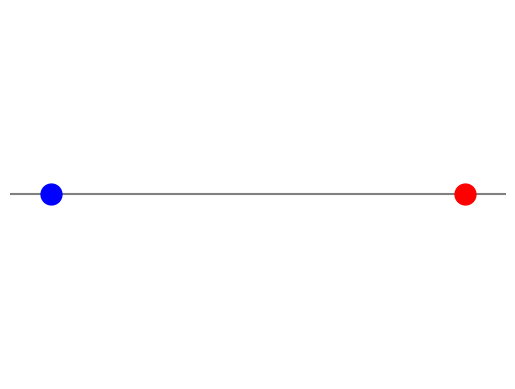

In [5]:
dosRobots = ss([[-1,1],[1,-1]],[[0],[0]],[[1,0],[0,1]],[[0],[0]])
yout, T = step(dosRobots,X0=[-10,10])

fig, ax = plt.subplots();

ax.plot([-12,12],[0,0],color='gray')
ax.axis('off')
#ax.plot([0,0],[-1,1],color='r')
plt.xlim(-12,12);
l, = ax.plot([-10],[0],color='b',marker='.',markersize=30)
r, = ax.plot([10],[0],color='r',marker='.',markersize=30)

def animate(i):
    l.set_data([yout[i,0]], [0])
    r.set_data([yout[i,1]], [0])

ani = FuncAnimation(fig, animate, frames=len(T), interval=1000/40);

In [6]:
# https://www.geeksforgeeks.org/how-to-install-ffmpeg-on-windows/ 
display(ani)

Si hay más de dos robots, deberiamos pensar en llevarlos a todos al centroide de sus vecinos (o algo parecido)

# El caso con multiples robots

$$\dot{x}_i = \sum_{j\in N_i}(x_j-x_i) \qquad \dot{x}=-Lx$$

El grafo generado est...

# Realimentación del sistema en espacio de estados

Sabemos que lo primero que debemos hacer para controlar un sistema es llevarlo a ser asintóticamente estable. Es decir que la parte real de todos sus valores propios sea negativa. 

# Una particula en una linea recta sin fricción

Diseñemos un control proporcional para el sistema propuesto, utilizando el espacio de estados.

$$m \ddot{x} = F$$

La ecuación de estado quedaría asi (con $m=1$). 

$$\dot{\mathbf{x}}=\left[\begin{array}{}0&1\\0&0\end{array}\right]\mathbf{x}+\left[\begin{array}{}0\\1\end{array}\right]\mathbf{u}$$

La ecuación de salida sería.

$$\mathbf{y}=\left[\begin{array}{}1&0\end{array}\right]\mathbf{x}$$

### Control de la particula

Si queremos controlar el sistema con un lazo cerrado debemos conectar de alguna forma la salida $\mathbf{y}$ con la entrada $\mathbf{u}$

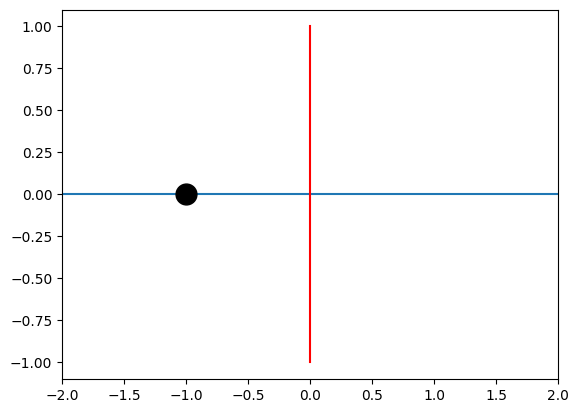

In [7]:
plt.plot([-2,2],[0,0])
plt.plot([0,0],[-1,1],color='r')
plt.plot([-1],[0],color='k',marker='.',markersize=30)
plt.xlim(-2,2);

El objetivo de control es que se mueva al origen. **¿Cómo lo logramos?**

$$\left.\begin{array}{}u>0 \text{ si } y<0 \\ u<0 \text{ si } y>0\end{array}\right\}\qquad \to \qquad u=-y$$

### Modificación de la dinamica del sistema 

En general tenemos: 

$$\mathbf{u}=-K\mathbf{y} = -KC\mathbf{x} $$

entonces: 

$$\dot{\mathbf{x}}=A\mathbf{x}+B\mathbf{u}=A\mathbf{x}-BKC\mathbf{x} = \left(A-BKC\right)\mathbf{x}$$

tenemos aquí un nuevo sistema, el sistema en lazo cerrado.

$$\dot{\mathbf{x}} = \left(A-BKC\right)\mathbf{x}=\hat{A}\mathbf{x}$$

nuestro trabajo ahora es seleccionar $K$ de tal forma que los valores propios de la matriz $\hat{A}$ den por lo menos un sistema estable. 

$$Re(\lambda)<0 \forall\lambda \in \texttt{eig}(A-BKC)$$

### La matriz de estado del sistema en lazo cerrado

Remplazamos los valores de las matrices y de $K=1$:

$$\hat{A}=\left(A-BKC\right)=\left(\left[\begin{array}{}0&1\\0&0\end{array}\right]-\left[\begin{array}{}0\\1\end{array}\right]1\left[\begin{array}{}1&0\end{array}\right]\right)$$

In [8]:
mA = sympy.Matrix([[0,1],[0,0]])-sympy.Matrix([0,1])*1*sympy.Matrix([[1,0]])
display(mA)

Matrix([
[ 0, 1],
[-1, 0]])

Analizando los valores propios del sistema tenemos que: 

In [9]:
display(mA.eigenvals())

{-I: 1, I: 1}

El sistema es criticamente estable. 

### Respuesta de la particula al lazo cerrado

Con el controlador propuesto, la particula se comporta como se muestra. 

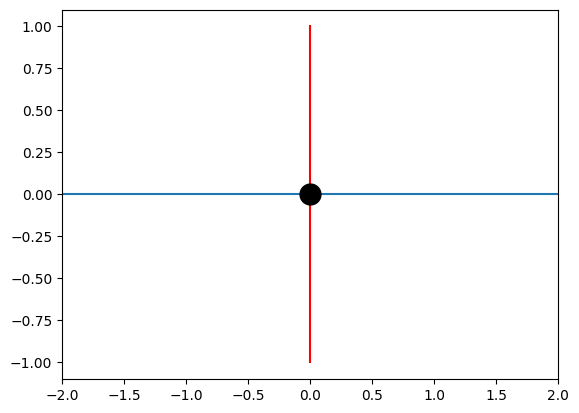

In [10]:
t = numpy.linspace(0,2*numpy.pi,40)
x = numpy.sin(t)

fig, ax = plt.subplots();

ax.plot([-2,2],[0,0])
ax.plot([0,0],[-1,1],color='r')
plt.xlim(-2,2);
l, = ax.plot([0],[0],color='k',marker='.',markersize=30)

animate = lambda i: l.set_data([x[i]], [0]);

ani = FuncAnimation(fig, animate, frames=len(t), interval=1000/40);

In [11]:
display(ani)

**¿Por qué no se queda en el origen si este es el objetivo?**

- No tenemos en cuenta la velocidad. 
- Necesitamos la información del estado (posición,velocidad) del sistema para estabilizarlo.

### Estabilizando la particula 

Para estabilizar la particula necesitamos conocer la información de todos los estados del sistema. Salvo que en nuestro sistema solo tenemos un sensor de posición:

$$\mathbf{y}=\left[\begin{array}{}1&0\end{array}\right]\mathbf{x}$$

El estado desconocido es la velocidad, el cual puede ser estimado de la posición. Por ahora supongamos que podemos medir ambos estados. 

$$\mathbf{y}_{supuesto}=\left[\begin{array}{}1&0\\0&1\end{array}\right]\mathbf{x}$$

con esta nueva matriz $C$, proponemos un controlador $K$:

$$K = \left[\begin{array}{}k_1&k_2\end{array}\right]$$

Encontremos la nueva matriz $\hat{A}$ para el sistema en lazo cerrado.

### Nueva matriz de estado del sistema en lazo cerrado

Recordemos que aquí estamos suponiendo que podemos medir ambos estados del sistema (posición y velocidad). Remplazamos los valores de las matrices y de $K$:

$$\hat{A}=\left(A-BKC\right)=\left(\left[\begin{array}{}0&1\\0&0\end{array}\right]-\left[\begin{array}{}0\\1\end{array}\right]\left[\begin{array}{}k_1&k_2\end{array}\right]\left[\begin{array}{}1&0\\0&1\end{array}\right]\right)$$

Luego $\hat{A}=$

In [12]:
k1,k2 = sympy.symbols('k_1 k_2')
mA3 = sympy.Matrix([[0,1],[0,0]])-sympy.Matrix([0,1])*sympy.Matrix([[k1,k2]])*sympy.Matrix([[1,0],[0,1]])
display(mA3)

Matrix([
[   0,    1],
[-k_1, -k_2]])

Los valores propios o polos del sistema son:

In [13]:
eigen = mA3.eigenvals()
display(eigen)

{-k_2/2 - sqrt(-4*k_1 + k_2**2)/2: 1, -k_2/2 + sqrt(-4*k_1 + k_2**2)/2: 1}

### Escogamos los valores del controlador

In [14]:
## Parametros del modelo

paramK1 = widgets.FloatSlider(value=1,min=0,max=10,step=0.1,description='k1', orientation="vertical")
paramK2 = widgets.FloatSlider(value=2,min=0,max=5,step=0.1,description='k2', orientation="vertical")

## Definicion de la simulacion

def polos(K1,K2):
    P1 = -K2/2+sympy.sqrt(K2**2-4*K1)/2
    P2 = -K2/2-sympy.sqrt(K2**2-4*K1)/2
    plt.scatter([sympy.re(P1),sympy.re(P2)],[sympy.im(P1),sympy.im(P2)])
    plt.grid()
    plt.title('Polos de la Particula en lazo cerrado con sensores de posición y velocidad')
    plt.xlabel('Real')
    plt.ylabel('Imaginario')
    plt.ylim(-3,3)
    plt.xlim(-6,0)

## Presentación de los resultados    
    
plot_exponencial = widgets.interactive_output(polos,{'K1':paramK1,'K2':paramK2})      
widgets.HBox([paramK1,paramK2,plot_exponencial])

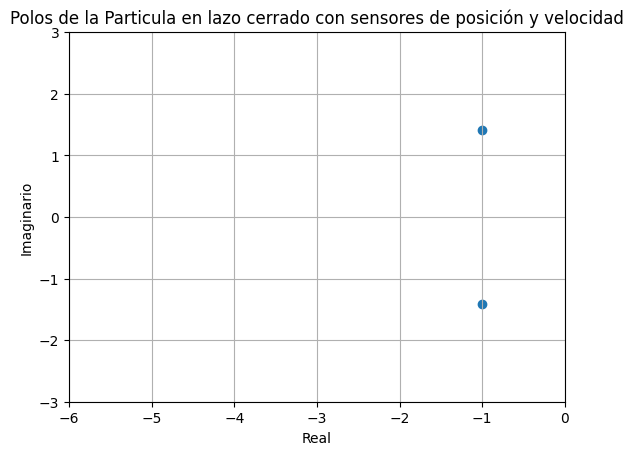

In [15]:
polos(3,2)

# Verifiquemos el comportamiento de la particula

- Tomemos los valores para el controlador $k_1=1$ y $k_2=1$
- Tomemos los valores para el controlador $k_1=0.1$ y $k_2=1$

### Verifiquemos el comportamiento de la particula

Tomemos los valores para el controlador $k_1=1$ y $k_2=2$:

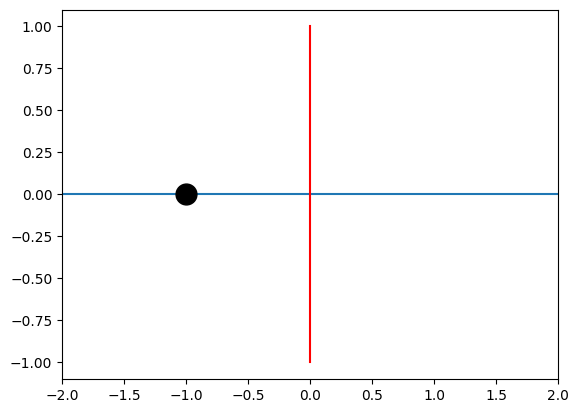

In [16]:
plt.rcParams["animation.html"] = "html5"#"jshtml"

particula = control.ss('0 1;-1 -2','1;0','1 0','0')
t,x = control.impulse_response(particula)

fig, ax = plt.subplots();

ax.plot([-2,2],[0,0])
ax.plot([0,0],[-1,1],color='r')
plt.xlim(-2,2);
l, = ax.plot([0],[0],color='k',marker='.',markersize=30)

animate = lambda i: l.set_data([-x[i]], [0]);

ani = FuncAnimation(fig, animate, frames=len(t), interval=1000/40);

In [17]:
display(ani)

# Los valores propios importante

- Es claro que algunos valores propios son mejores que otros. 
  - Algunos causan oscilaciones
  - Algunos hacen que el sistema responda lentamente
  - etc.

- Próximamente veremos como selecionar los valores propios. 